## Importing the necessary NLTK packages

In [1]:
import nltk

In [2]:
#nltk.download('opinion_lexicon')

In [3]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [4]:
positive_wds = set(opinion_lexicon.positive())
negative_wds = set(opinion_lexicon.negative())

In [5]:
# Importing spaCy and load the language library
# import spacy
# nlp = spacy.load('en_core_web_sm')

## Loading the dataset in which I stored the scraped data using the URLs 

In [6]:
import pandas as pd
df1=pd.read_csv('scrape.csv',usecols=['url_id','link',"title","article"])
a=list((df1.iloc[:,3]))
a

['\nIntroduction\n“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.\nAfter the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in dete

In [7]:
#nltk.download('punkt')

## Extracting all stopwords from the given .docx files and storing in "stpwds" variable

In [8]:
!pip install python-docx
from docx import Document
stpwds=[]
b=['StopWords_Auditor.docx','StopWords_Currencies.docx','StopWords_DatesandNumbers.docx',
  'StopWords_Generic.docx','StopWords_GenericLong.docx','StopWords_Geographic.docx',
   'StopWords_Names.docx']
p=0
while p<len(b):
    document = Document(f'{b[p]}')
    for i in document.paragraphs:
        stpwds.append(str(i.text))
    p+=1
print(len(stpwds))

14111


## Below here I'm calculating all the required scores for the various articles in the dataset 

### Functions to calculate positive score in the article

In [9]:
def pos_score(sent):
    """Returns a score btw -1 and 1"""
    sent = [e for e in sent if e.isalnum()]
    total = len(sent)
    pos = len([e for e in sent if e in positive_wds])
    if total > 0:
        return (pos)
    else:
        return 0
def score_text_1(text):
    positive_scores=[]
    sents = sent_tokenize(text)
    for sent in sents:
        wds = word_tokenize(sent.lower())
        tokens_wo_stopwords = [t for t in wds if t not in stpwds]
        
        positive=pos_score(tokens_wo_stopwords)
        positive_scores.append(positive)
        
    
    return sum(positive_scores) / len(positive_scores)

### Functions to calculate negative score in the article

In [10]:
def neg_score(sent):
    """Returns a score btw -1 and 1"""
    sent = [e for e in sent if e.isalnum()]
    total = len(sent)
    neg = len([e for e in sent if e in negative_wds])
    if total > 0:
        return (neg)
    else:
        return 0
def score_text_2(text):
    negative_scores=[]
    sents = sent_tokenize(text)
    for sent in sents:
        wds = word_tokenize(sent.lower())
        tokens_wo_stopwords = [t for t in wds if t not in stpwds]
        
        negative=neg_score(tokens_wo_stopwords)
        negative_scores.append(negative)
   
    return sum(negative_scores) / len(negative_scores)

### Functions to calculate polarity score in the article

In [11]:
def pol_score(sent):
    """Returns a score btw -1 and 1"""
    sent = [e for e in sent if e.isalnum()]
    total = len(sent)
    pos = len([e for e in sent if e in positive_wds])
    neg = len([e for e in sent if e in negative_wds])
    if total > 0:
        return ((pos - neg) / ((pos + neg)+0.000001))
    else:
        return 0
def score_text_3(text):
    polarity_scores = []
    sents = sent_tokenize(text)
    for sent in sents:
        wds = word_tokenize(sent.lower())
        tokens_wo_stopwords = [t for t in wds if t not in stpwds]
        
        polarity = pol_score(tokens_wo_stopwords)
        polarity_scores.append(polarity)
    return sum(polarity_scores) / len(polarity_scores)
   


### Functions to calculate subjectivity score in the article

In [12]:
def sub_score(sent):
    """Returns a score btw -1 and 1"""
    sent = [e for e in sent if e.isalnum()]
    total = len(sent)
    pos = len([e for e in sent if e in positive_wds])
    neg = len([e for e in sent if e in negative_wds])
    if total > 0:
        return ((pos + neg) / ((len(sent))+0.000001))
    else:
        return 0
def score_text_4(text):
    subjectivity_scores = []
    sents = sent_tokenize(text)
    for sent in sents:
        wds = word_tokenize(sent.lower())
        tokens_wo_stopwords = [t for t in wds if t not in stpwds]
        
        subjectivity = sub_score(tokens_wo_stopwords)
        subjectivity_scores.append(subjectivity)
    return sum(subjectivity_scores) / len(subjectivity_scores)

### Function to calculate Average sentence length in the article
    

In [13]:
def avg_sentence_length(text):   
    sents = sent_tokenize(text)
    s1=len(sents)
    wds_cnt_including_stpwds=[]
    for sent in sents:
            wds = word_tokenize(sent.lower())
            wds_cnt_including_stpwds.append(len(wds))
    s2=sum(wds_cnt_including_stpwds)
    avg_sent_len=s2/s1
    return (avg_sent_len)

In [14]:
# This list contains the average sentence length of all the articles
asl=[avg_sentence_length(t) for t in a]

### Function to calculate Percentage of complex words in the article

In [15]:
from nltk.tokenize import SyllableTokenizer

# SSP = SyllableTokenizer()
# SSP.tokenize('justification')
def complex_percent(text):   
    sents = sent_tokenize(text)
    #s1=len(sents)
    wds_cnt_including_stpwds=[]
    cmpx_cnt_including_stpwds=[]
    for sent in sents:
            wds = word_tokenize(sent.lower())
            for wd in wds:
                SSP = SyllableTokenizer()
                w=SSP.tokenize(wd) 
                if len(w)>2:
                    cmpx_cnt_including_stpwds.append(1) 
            wds_cnt_including_stpwds.append(len(wds))
    s4=sum(cmpx_cnt_including_stpwds)
    s3=sum(wds_cnt_including_stpwds)
    comp_percent=s4/s3
    return (comp_percent)

In [16]:
# This list contains the Percentage of complex words of all the articles
cxp=[complex_percent(t) for t in a]


C:\Users\DELL\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '“'
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '1'
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '0'
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '”'
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: '’'
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: U

### Function to calculate complex word count in the article

In [17]:
def complex_cnt(text):   
    sents = sent_tokenize(text)
    cmpx_cnt_including_stpwds=[]
    for sent in sents:
            wds = word_tokenize(sent.lower())
            for wd in wds:
                SSP = SyllableTokenizer()
                w=SSP.tokenize(wd) 
                if len(w)>2:
                    cmpx_cnt_including_stpwds.append(1) 
            #wds_cnt_including_stpwds.append(len(wds))
    s5=sum(cmpx_cnt_including_stpwds)
    #s2=sum(wds_cnt_including_stpwds)
    #comp_percent=s3/s2
    return (s5)


In [18]:
# This list contains the complex word count of all the articles
cxp_cnt=[complex_cnt(t) for t in a]

### Code to find the Word count in the articles excluding the stopwords

In [19]:
from nltk.corpus import stopwords
import string
import re

e0=[]
y=0
while y<len(a):
    e=[]
    stop = set(stopwords.words('english'))
    text_tokens = sent_tokenize(a[y])

    for g in text_tokens:
        py_str = g
        py_opstr = re.sub(r'[^\w\s]','',py_str)
        n=word_tokenize(py_opstr)
        for t in n:
            if t not in stop:
                e.append(t)
    e0.append(len(e))
    e.clear()
    y+=1
# print(e0)
    



### Code to find the syllable per word in the articles

In [20]:
e10=[]
y=0
while y<len(a):
    e=[]
    stop = set(stopwords.words('english'))
    text_tokens = sent_tokenize(a[y])
    vowels=['a','e','i','o','u']
    vow_cnt=[]
    
    for g in text_tokens:
        py_str = g
        py_opstr = re.sub(r'[^\w\s]','',py_str)
        n=word_tokenize(py_opstr)
        for t in n:
            if t.isalpha()==True:
                if t not in stop:
                    if t[-2:]=='ed' or t[-2:]=='es':
                        for d in t[:-2]:
                            for r in d:
                                if r in vowels:
                                    vow_cnt.append(1)
                    else:
                        for d in t:
                            for r in d:
                                if r in vowels:
                                    vow_cnt.append(1)
#                 e.append(t)
    e10.append(len(vow_cnt))
    #e.clear()
    y+=1
print(e10)

[2985, 1770, 2688, 2087, 2400, 1722, 972, 0, 903, 2896, 2771, 1902, 1745, 2107, 2107, 811, 2183, 1389, 1108, 463, 0, 1925, 927, 2471, 946, 537, 1494, 994, 532, 241, 1007, 230, 1940, 731, 1348, 2639, 2140, 1887, 993, 1603, 599, 2311, 1255, 1271, 1434, 2033, 1338, 1901, 1061, 1742, 2305, 4262, 2321, 2424, 2424, 2424, 2314, 2454, 1453, 2490, 1305, 1553, 1472, 1472, 215, 1393, 820, 1646, 1242, 603, 603, 603, 698, 1406, 1446, 1446, 1704, 1949, 2487, 884, 2723, 1483, 497, 2984, 1704, 2259, 2403, 2809, 2551, 1081, 2267, 1301, 993, 2516, 2566, 1840, 1716, 634, 355, 440, 294, 329, 1002, 1356, 1229, 2512, 796, 0, 1263, 1333, 2227, 1723, 1178, 1495]


### Code to find the personal pronouns in the article

In [21]:
e1=[]
e2=[]
y=0
while y<len(a):
    e=[]
    stop = set(stopwords.words('english'))
    text_tokens = sent_tokenize(a[y])

    for g in text_tokens:
        py_str = g
        py_opstr = re.sub(r'[^\w\s]','',py_str)
        n=word_tokenize(py_opstr)
        for t in n:
            if t not in stop:
                e.append(t)
        f=' '.join(e)
        pronounRegex = re.compile(r'\b(I|we|my|ours|(?-i:us))\b',re.I)
        pronouns = pronounRegex.findall(f)
        for h in pronouns:
            e1.append(h)
    #e2.clear()
    e2.append(len(e1))
    e1.clear()
    y+=1
print((e2))
    

[75, 88, 6, 182, 352, 285, 26, 0, 0, 120, 0, 268, 210, 308, 308, 0, 8, 0, 0, 0, 0, 0, 27, 117, 15, 0, 124, 0, 0, 0, 251, 0, 0, 16, 61, 60, 125, 309, 31, 64, 6, 56, 272, 136, 0, 79, 351, 0, 0, 0, 169, 0, 46, 0, 0, 0, 49, 51, 3, 0, 0, 505, 96, 96, 2, 169, 48, 8, 2, 0, 0, 0, 248, 0, 0, 0, 58, 6, 2, 51, 190, 179, 15, 86, 1023, 318, 125, 14, 0, 2, 2, 119, 30, 0, 0, 84, 0, 0, 16, 37, 6, 14, 17, 0, 53, 0, 0, 0, 0, 299, 24, 0, 0, 66]


### Looping over the above defined functions for each article in the dataset to find the positive,negative,polarity,subjectivity scores and average sentence length and store them in their respective list and creating a dataframe with the data

In [22]:
text_pscore = [score_text_1(t) for t in a]
text_nscore = [score_text_2(t) for t in a]
text_polscore = [score_text_3(t) for t in a]
text_subscore=[score_text_4(t) for t in a]
asl=[avg_sentence_length(t) for t in a]

df = pd.DataFrame(
    {
        "title":list((df1.iloc[:,2])),
        "text": a,
        "positive_scores": text_pscore,
        "negative_scores": text_nscore,
        "polarity_scores": text_polscore,
        "subjectivity_scores": text_subscore,
    }
)
#df.to_csv('data/dictionary_based_sentiment.csv')

In [23]:
df

,title,text,positive_scores,negative_scores,polarity_scores,subjectivity_scores
0,AI in healthcare to Improve Patient Outcomes,\nIntroduction\n“If anything kills over 10 mil...,0.857143,0.441558,0.274892,0.100408
1,What if the Creation is Taking Over the Creator?,"\nHuman minds, a fascination in itself carryin...",0.750000,0.462500,0.107917,0.158304
2,What Jobs Will Robots Take From Humans in The ...,\nIntroduction\nAI is rapidly evolving in the ...,0.776471,0.423529,0.227843,0.114273
3,Will Machine Replace The Human in the Future o...,\n“Anything that could give rise to smarter-th...,0.726316,0.294737,0.248421,0.133783
4,Will AI Replace Us or Work With Us?,\n“Machine intelligence is the last invention ...,0.746835,0.316456,0.248945,0.127552
...,...,...,...,...,...,...
109,Blockchain for Payments,\nReconciling with the financial realities of ...,0.428571,0.551020,-0.064626,0.133260
110,The future of Investing,\nWhat Is an Investment?\nAn investment is a r...,0.629032,0.225806,0.282258,0.073937
111,Big Data Analytics in Healthcare,\nQuality and affordable healthcare is a visio...,0.424242,0.712121,-0.166667,0.132988
112,Business Analytics In The Healthcare Industry,\nAnalytics is a statistical scientific proces...,1.275862,0.137931,0.493103,0.094695


### Adding some more columns to the dataframe

In [24]:
df['AVG SENTENCE LENGTH']=asl
df['PERCENTAGE OF COMPLEX WORDS']=cxp
df['FOG INDEX']=(0.4*(df['AVG SENTENCE LENGTH'] + df['PERCENTAGE OF COMPLEX WORDS']))
df['AVG NUMBER OF WORDS PER SENTENCE']=asl
df['COMPLEX WORD COUNT']=cxp_cnt
df['WORD COUNT']=e0
df['SYLLABLE PER WORD']=e10
df['PERSONAL PRONOUNS']=e2


### Let's check one entry in the dataframe

In [25]:
df.iloc[1,:]

title                                What if the Creation is Taking Over the Creator?
text                                \nHuman minds, a fascination in itself carryin...
positive_scores                                                                  0.75
negative_scores                                                                0.4625
polarity_scores                                                              0.107917
subjectivity_scores                                                          0.158304
AVG SENTENCE LENGTH                                                            20.525
PERCENTAGE OF COMPLEX WORDS                                                  0.172351
FOG INDEX                                                                     8.27894
AVG NUMBER OF WORDS PER SENTENCE                                               20.525
COMPLEX WORD COUNT                                                                283
WORD COUNT                                            

In [26]:
df.dtypes

title                                object
text                                 object
positive_scores                     float64
negative_scores                     float64
polarity_scores                     float64
subjectivity_scores                 float64
AVG SENTENCE LENGTH                 float64
PERCENTAGE OF COMPLEX WORDS         float64
FOG INDEX                           float64
AVG NUMBER OF WORDS PER SENTENCE    float64
COMPLEX WORD COUNT                    int64
WORD COUNT                            int64
SYLLABLE PER WORD                     int64
PERSONAL PRONOUNS                     int64
dtype: object

# Visualizing the results

### Grouping only the record where positive_score is greater than 0.8 and sorting it by polarity scores
polarity score gives whether overall the article was conveying positive or negative information

In [27]:
a=df[df['positive_scores']>0.8].sort_values(by='polarity_scores',ascending=False)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
def plot(data,d,f,g,h):
    fig, ax = plt.subplots(1, 4, figsize=(8, 8))

    g1 = sns.barplot(x=d,y='title',data=data,orient='h',ax=ax[0])

    g2 = sns.barplot(x=f,y='title',data=data,orient='h',ax=ax[1])
    g2.set(yticklabels=[])  
    g2.set(ylabel=None)
    g2.tick_params(bottom=False)  # remove the ticks

    g3 = sns.barplot(x=g,y='title',data=data,orient='h',ax=ax[2])
    g3.set(yticklabels=[])  
    g3.set(ylabel=None)
    g3.tick_params(bottom=False)  # remove the ticks

    g2 = sns.barplot(x=h,y='title',data=data,orient='h',ax=ax[3])
    g2.set(yticklabels=[])  
    g2.set(ylabel=None)
    g2.tick_params(bottom=False)  # remove the ticks

    plt.show()

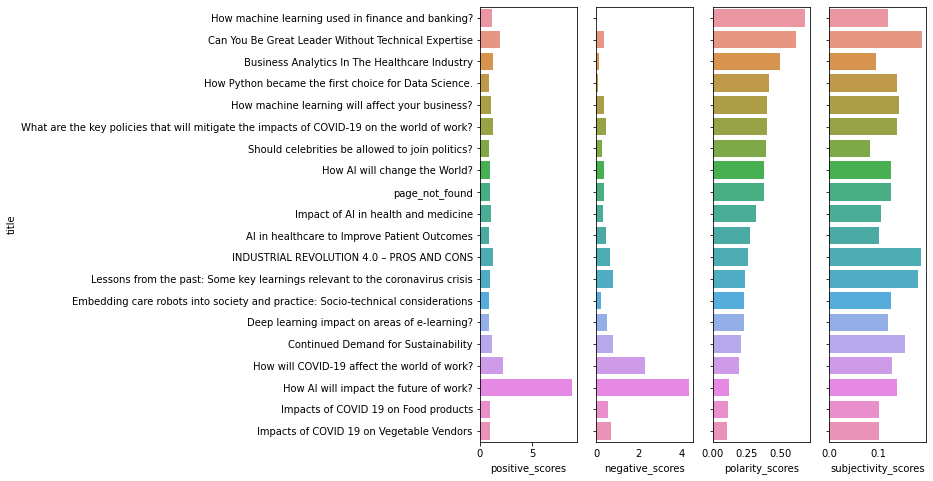

In [30]:
plot(a,'positive_scores','negative_scores','polarity_scores','subjectivity_scores')

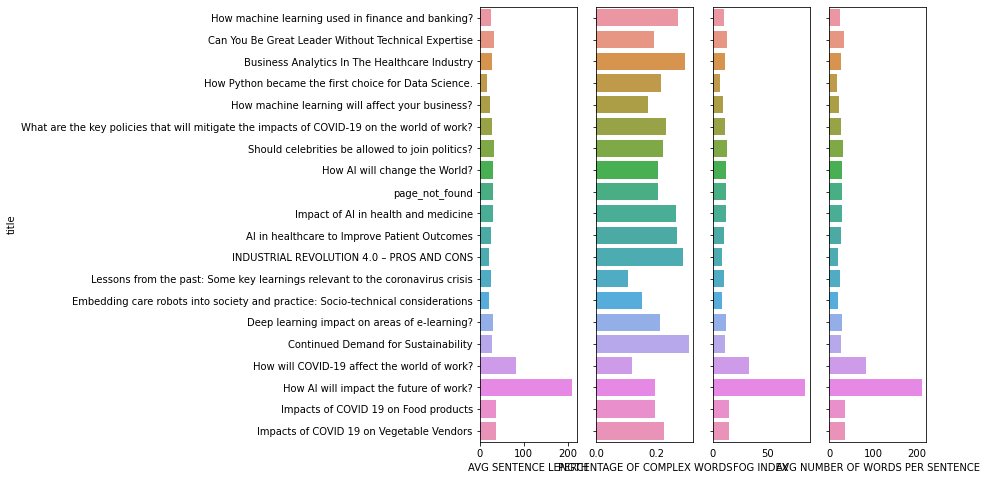

In [31]:
plot(a,'AVG SENTENCE LENGTH' ,
'PERCENTAGE OF COMPLEX WORDS',
'FOG INDEX',
'AVG NUMBER OF WORDS PER SENTENCE')

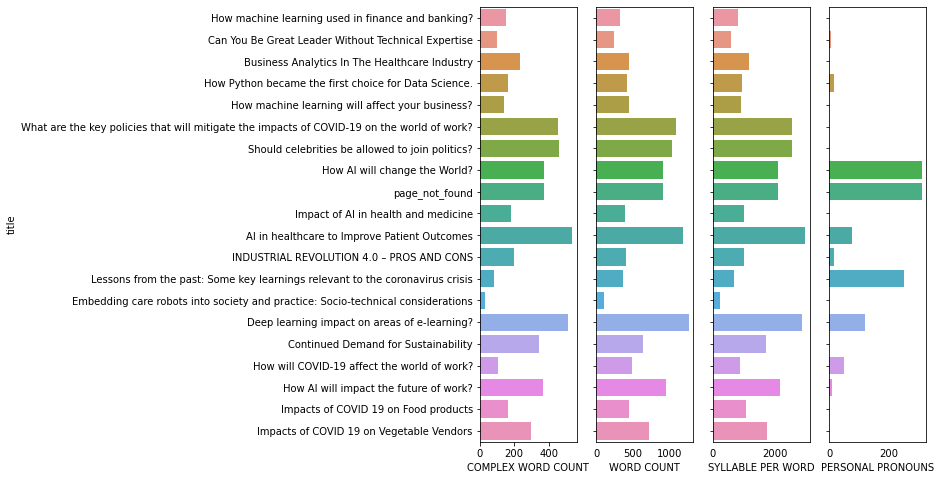

In [32]:
plot(a,'COMPLEX WORD COUNT',
'WORD COUNT',                           
'SYLLABLE PER WORD',                   
'PERSONAL PRONOUNS')

### Grouping only the record where positive_score is greater between 0.5 and 0.8 and sorting it by polarity scores¶

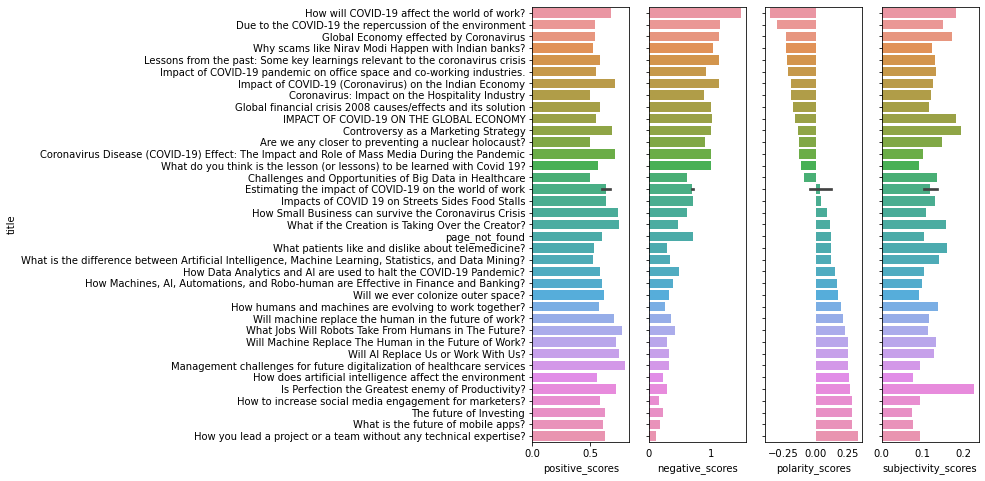

In [33]:
a1=df[(df['positive_scores']>=0.5) & (df['positive_scores']<=0.8) ].sort_values(by='polarity_scores')
plot(a1,'positive_scores','negative_scores','polarity_scores','subjectivity_scores')

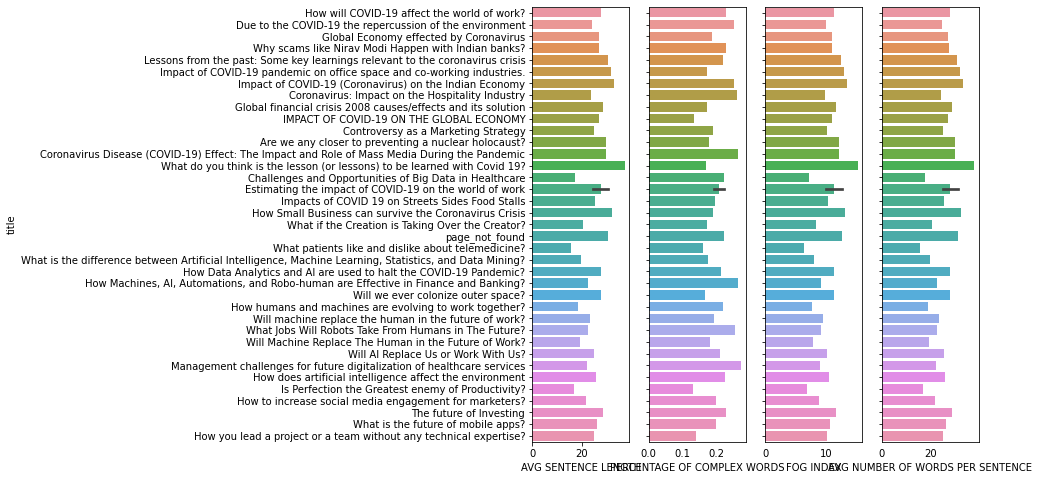

In [34]:
plot(a1,'AVG SENTENCE LENGTH' ,
'PERCENTAGE OF COMPLEX WORDS',
'FOG INDEX',
'AVG NUMBER OF WORDS PER SENTENCE')

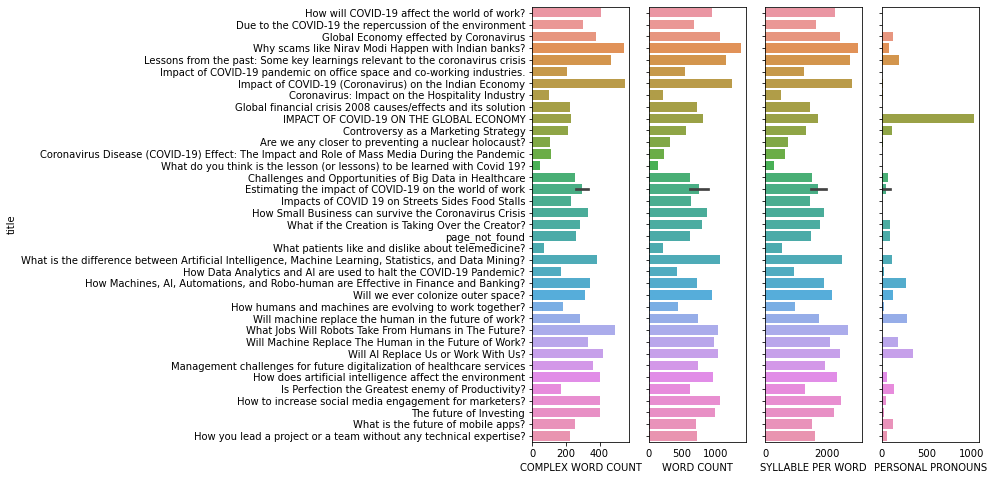

In [35]:
plot(a1,'COMPLEX WORD COUNT',
'WORD COUNT',                           
'SYLLABLE PER WORD',                   
'PERSONAL PRONOUNS')

### Grouping only the record where positive_score is lesser than 0.5 and sorting it by polarity scores¶

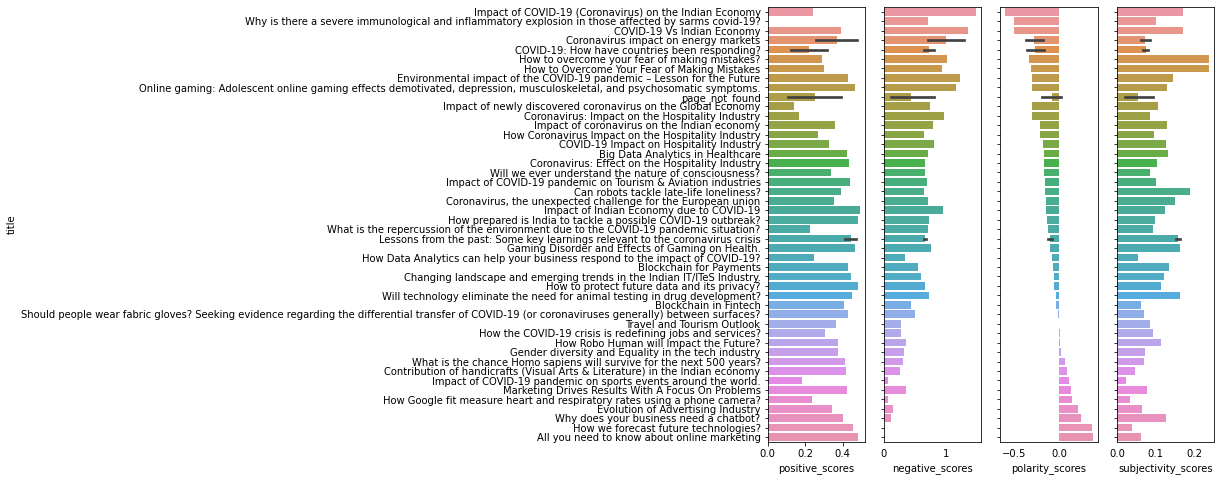

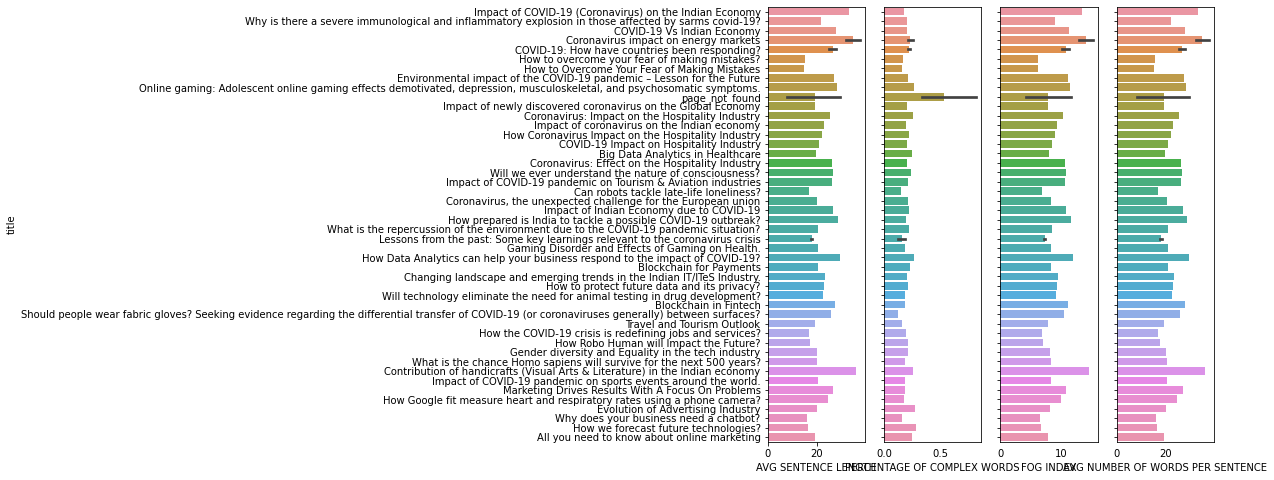

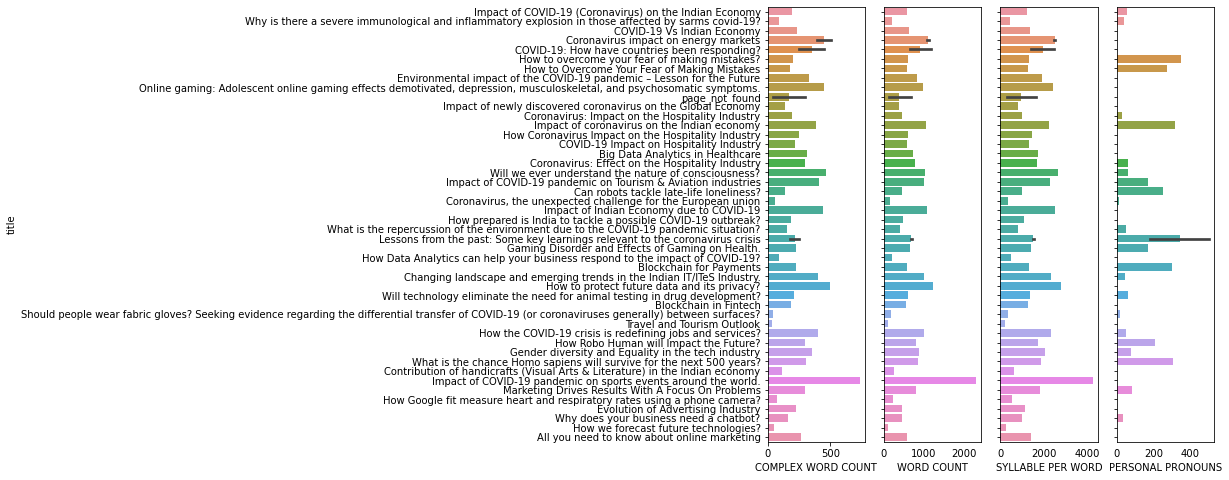

In [36]:
a2=df[(df['positive_scores']<0.5)].sort_values(by='polarity_scores')
plot(a2,'positive_scores','negative_scores','polarity_scores','subjectivity_scores')
plot(a2,'AVG SENTENCE LENGTH' ,
'PERCENTAGE OF COMPLEX WORDS',
'FOG INDEX',
'AVG NUMBER OF WORDS PER SENTENCE')
plot(a2,'COMPLEX WORD COUNT',
'WORD COUNT',                           
'SYLLABLE PER WORD',                   
'PERSONAL PRONOUNS')

### Let's find where the majority metrics in the article lie

In [37]:
def violinplot(x):
    plt.figure(figsize=(30, 20))
    sns.violinplot(x=df[x])
    plt.title(x)
    plt.show()

In [38]:
l=list(df.columns)

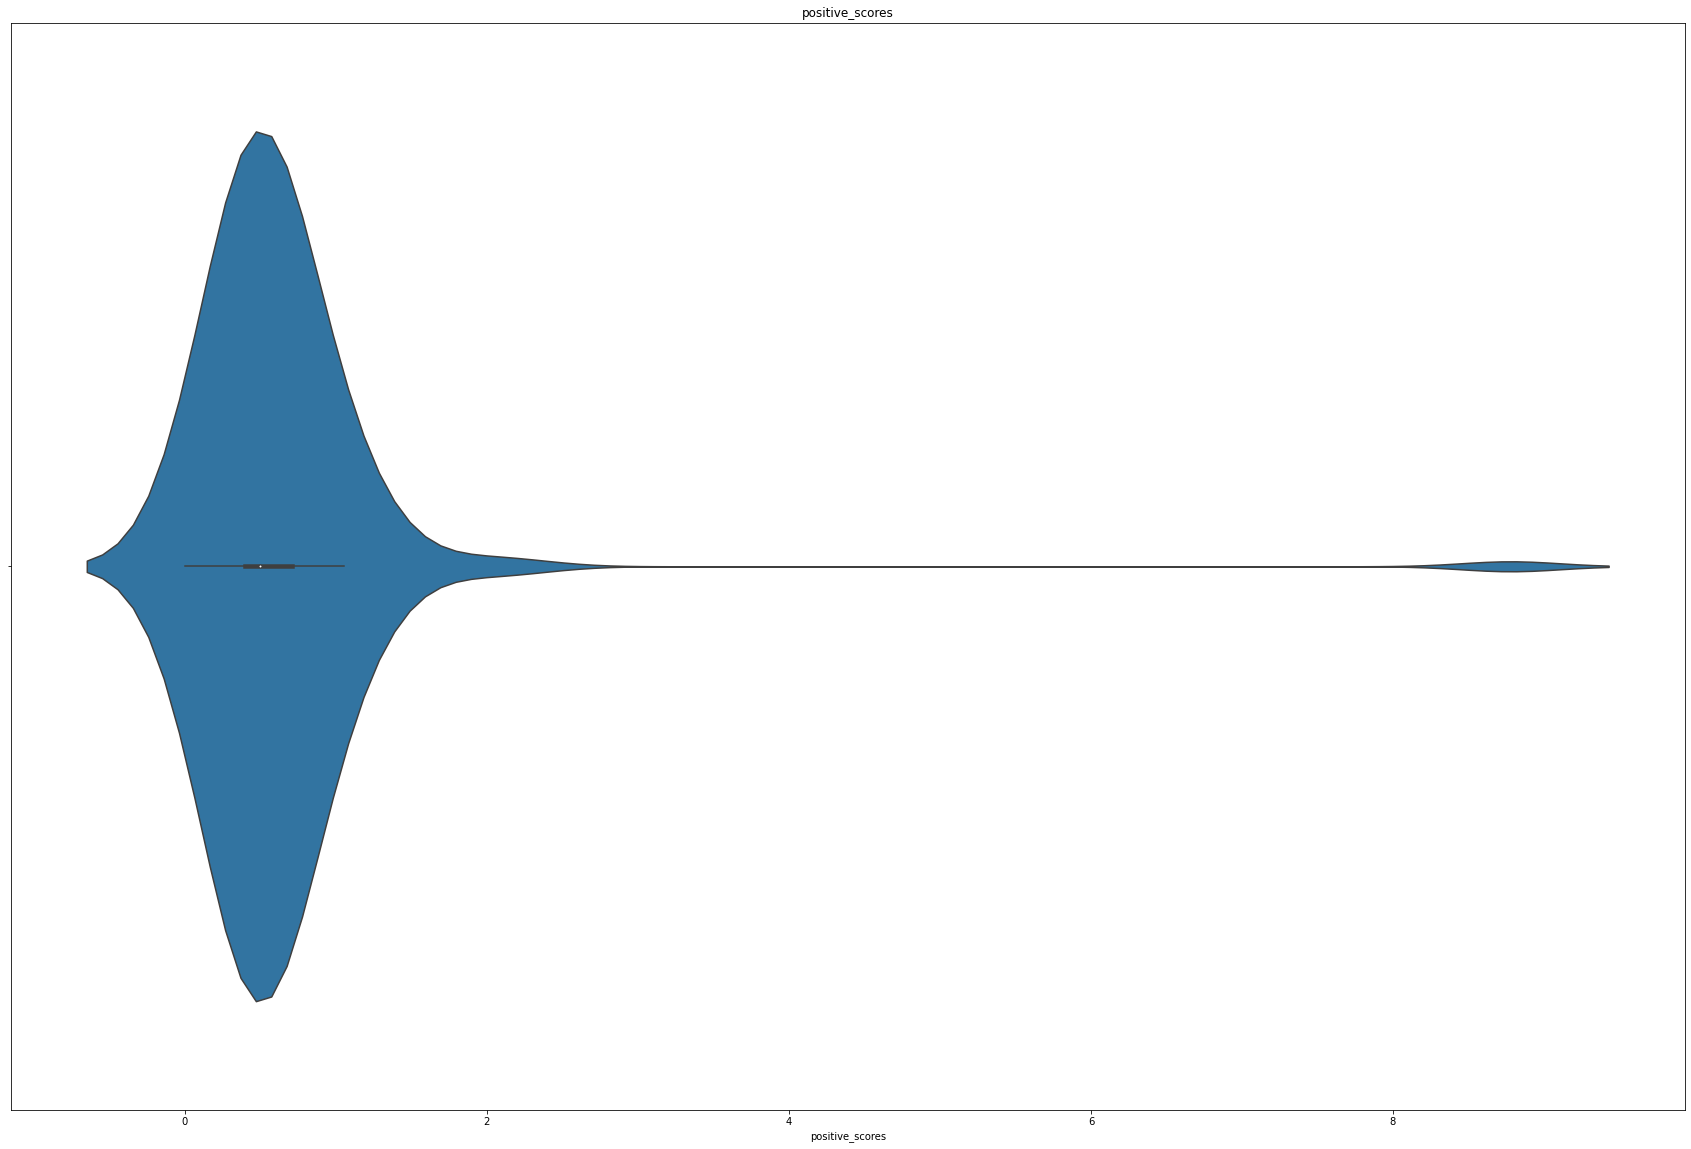

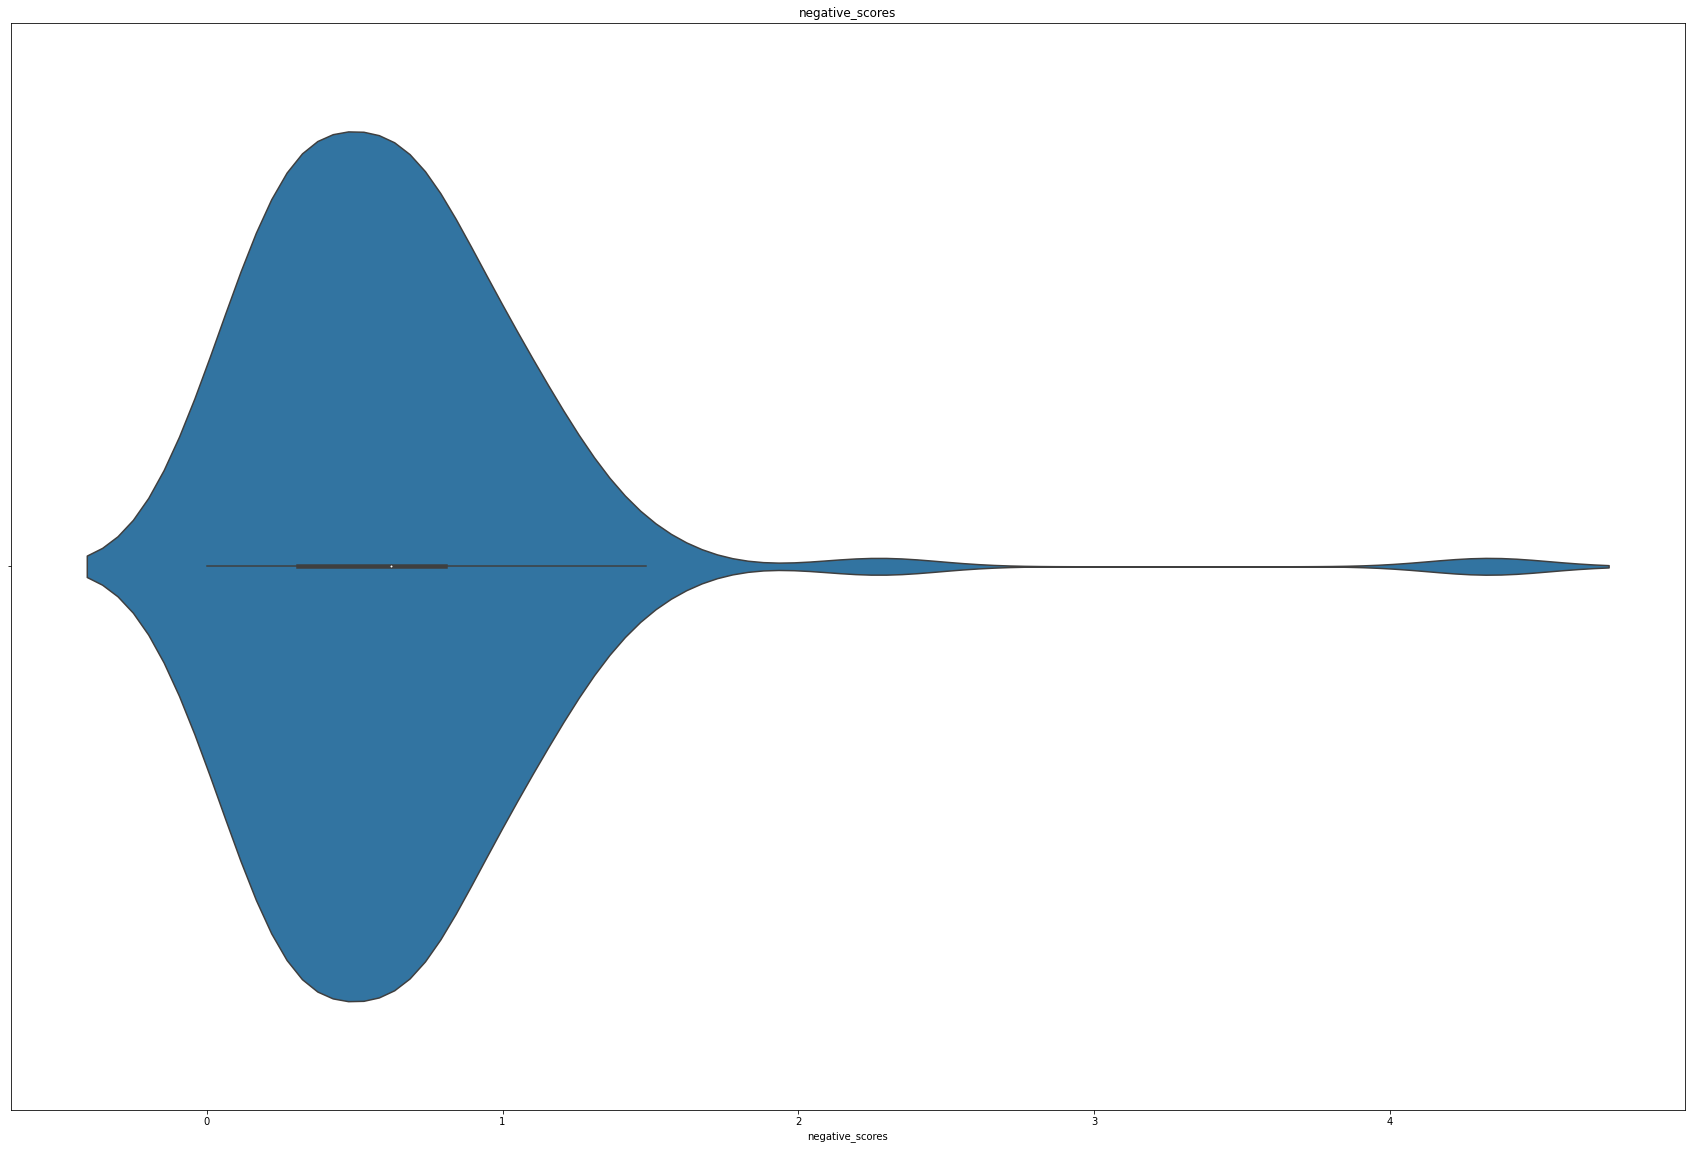

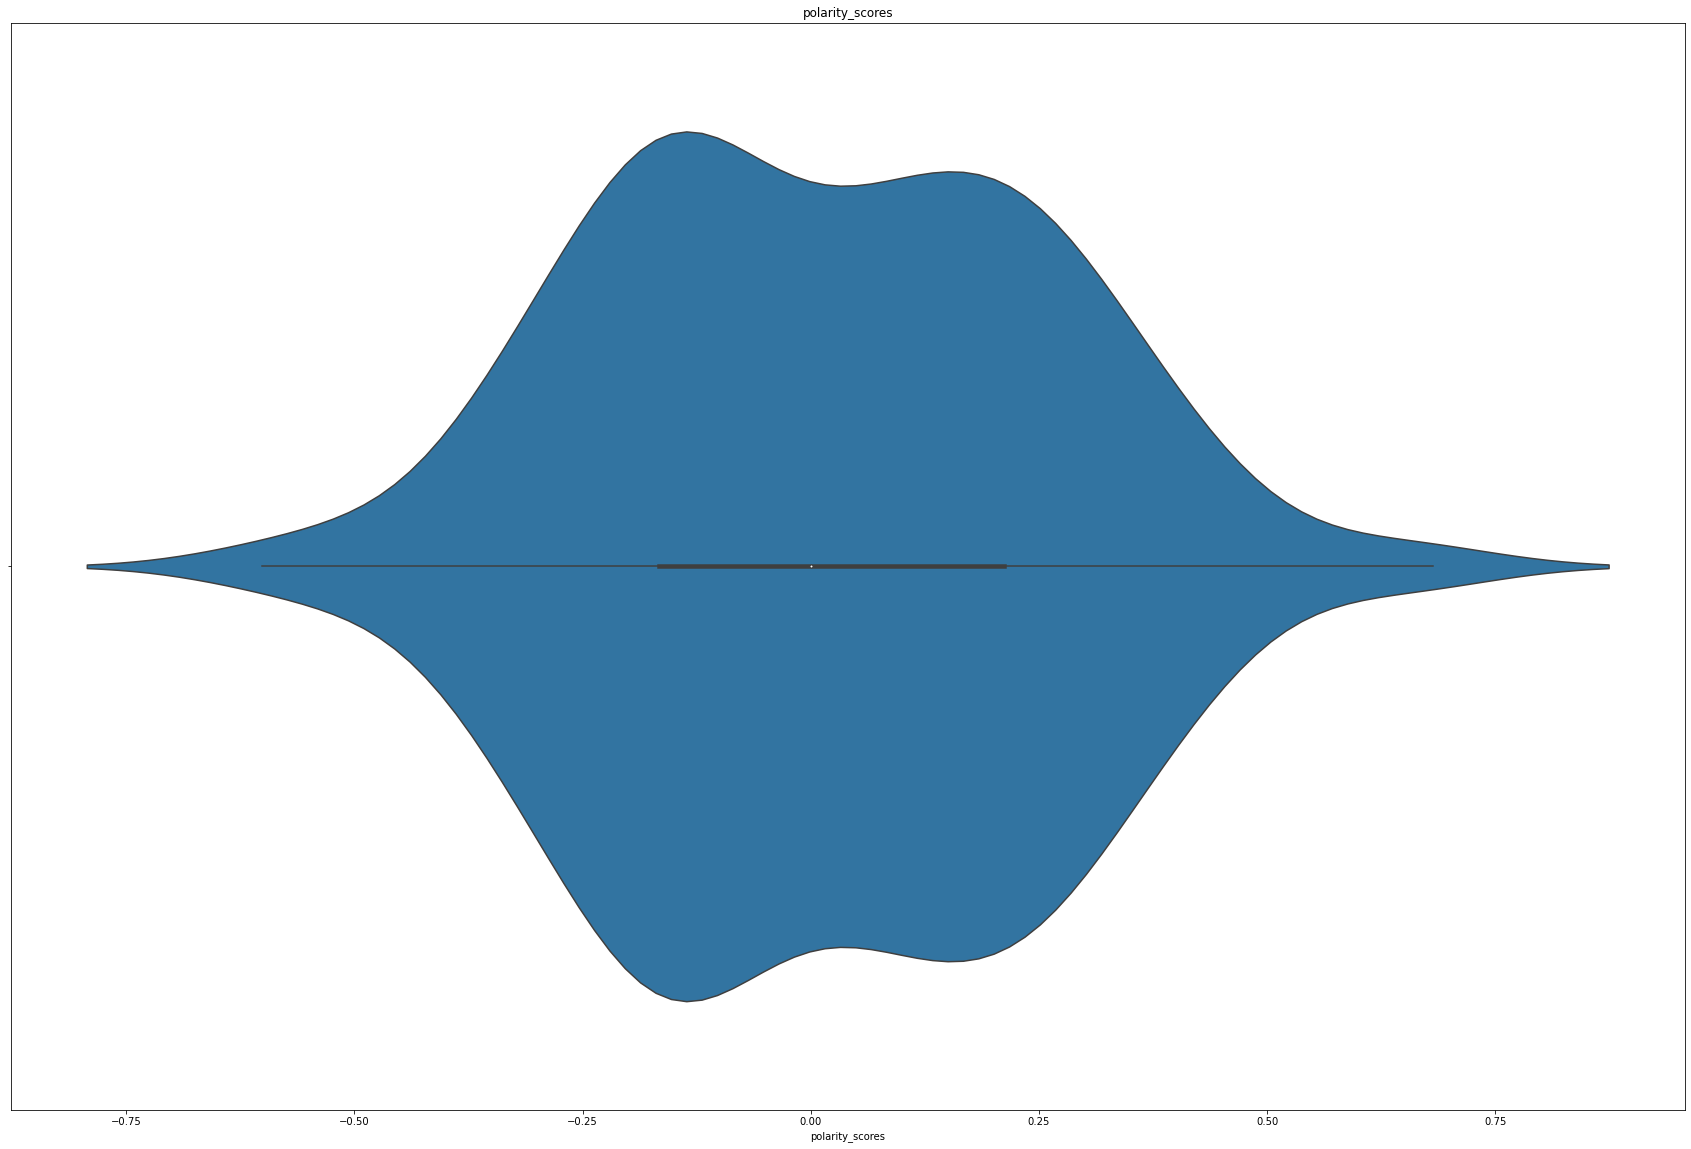

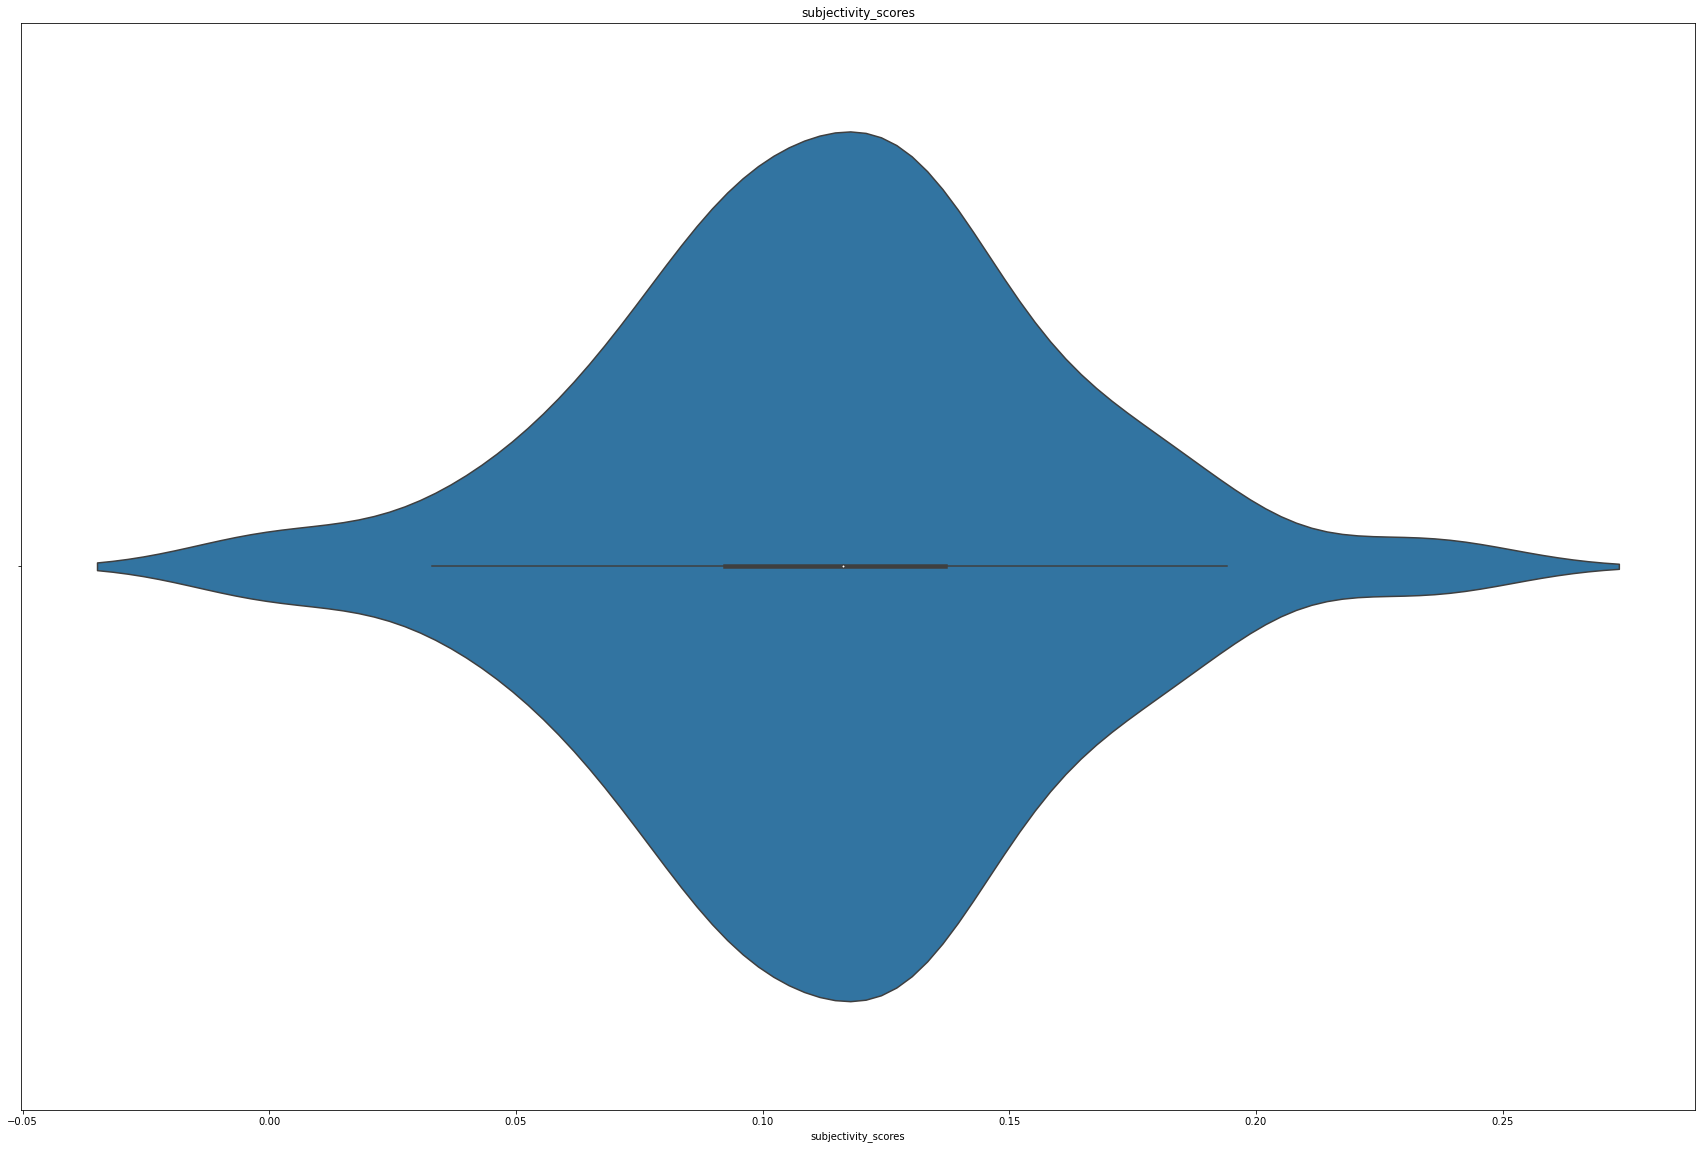

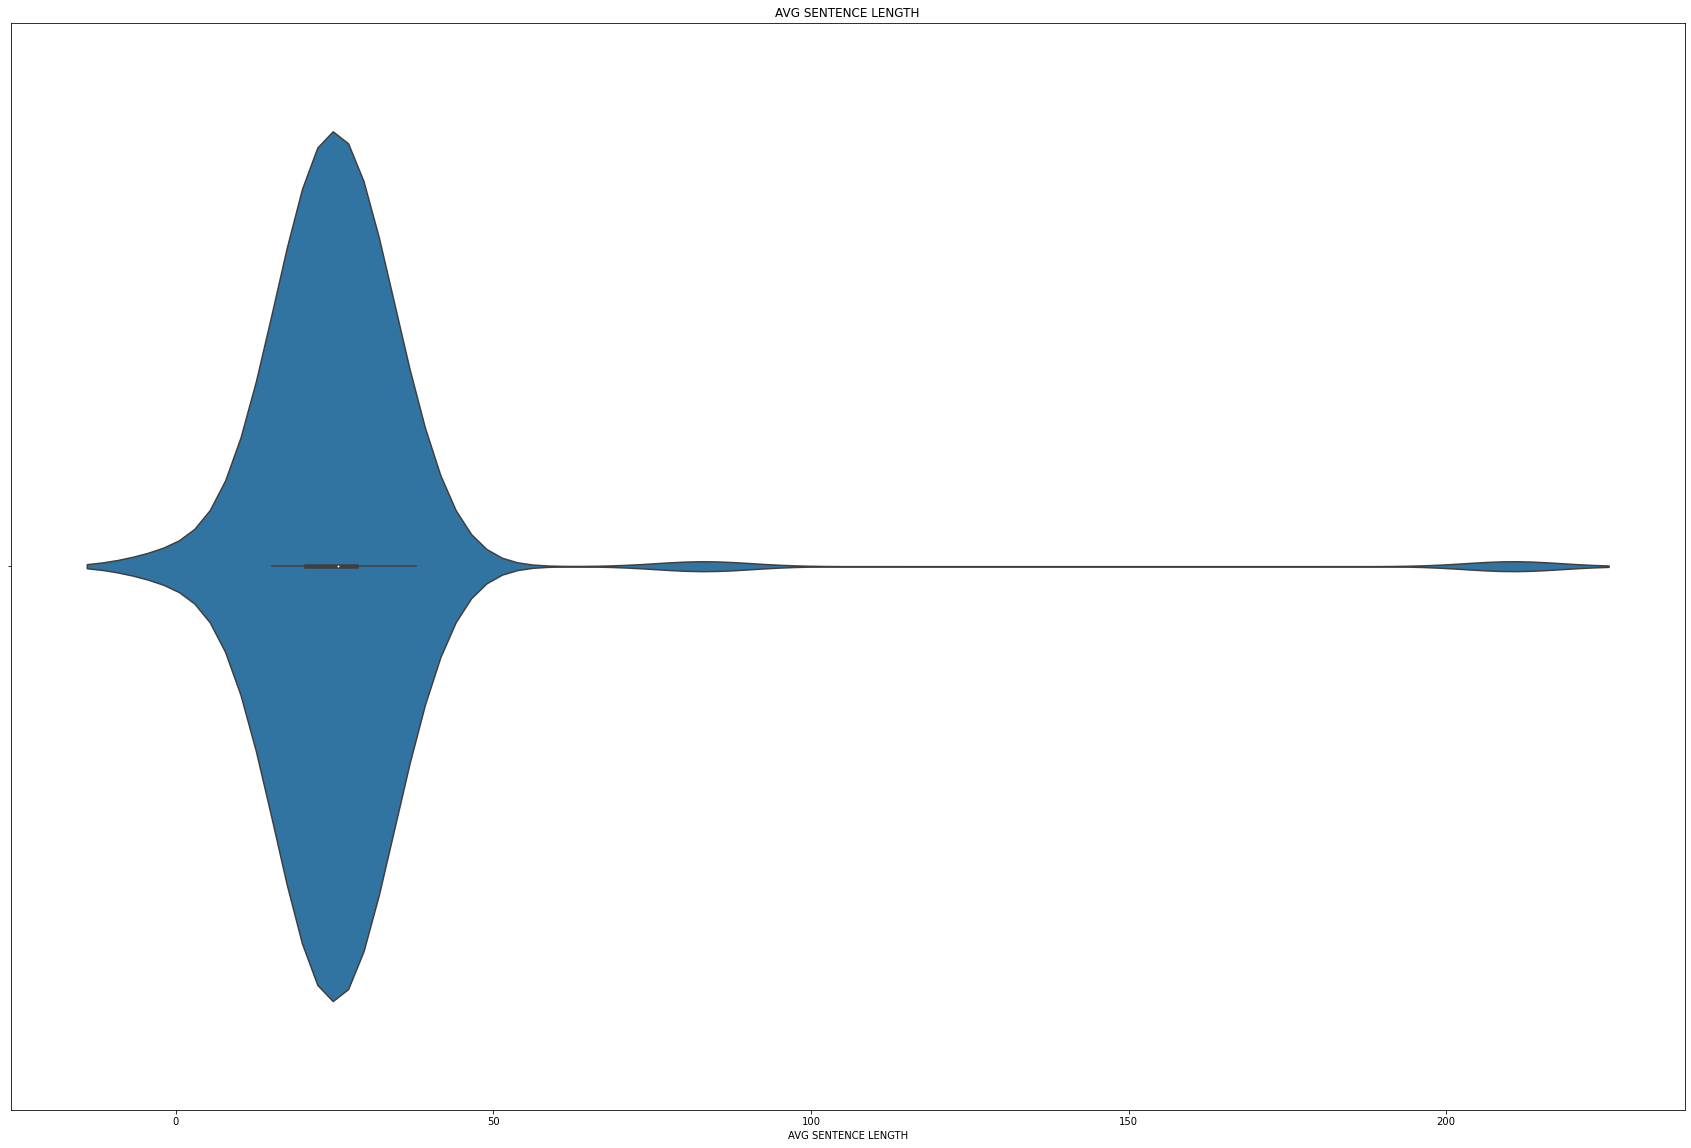

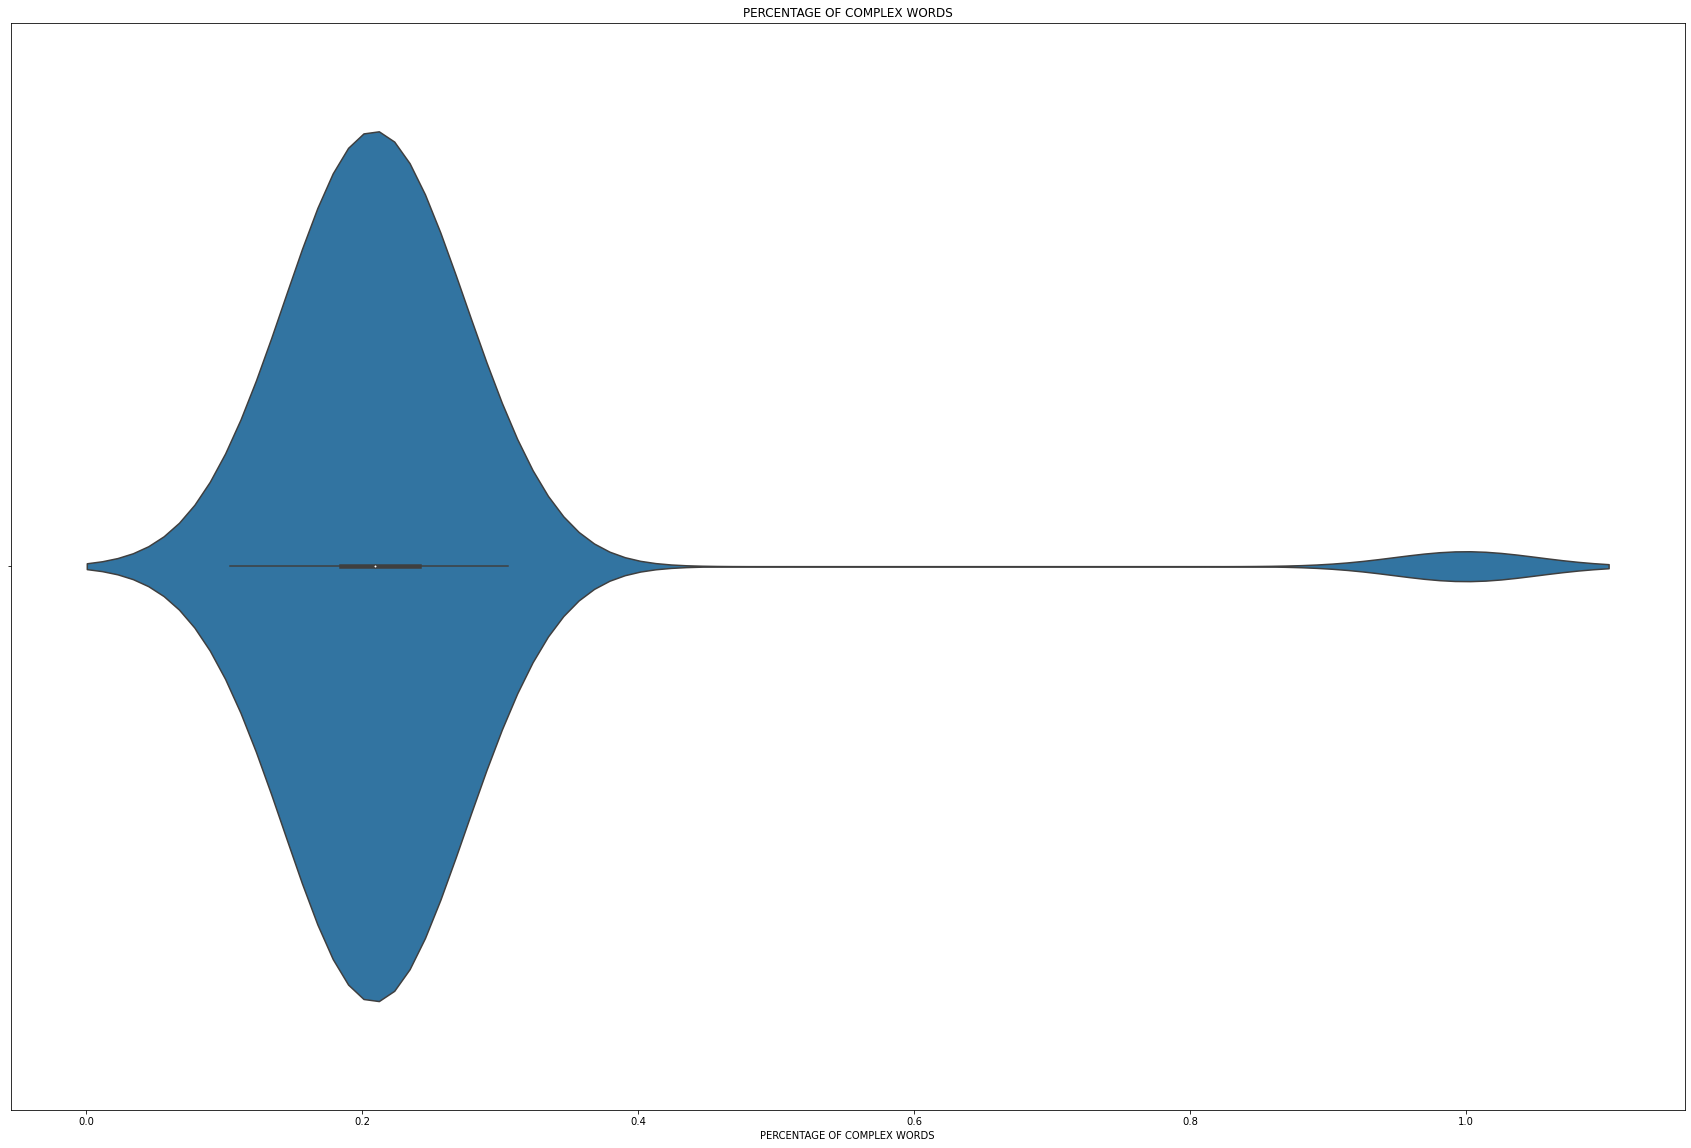

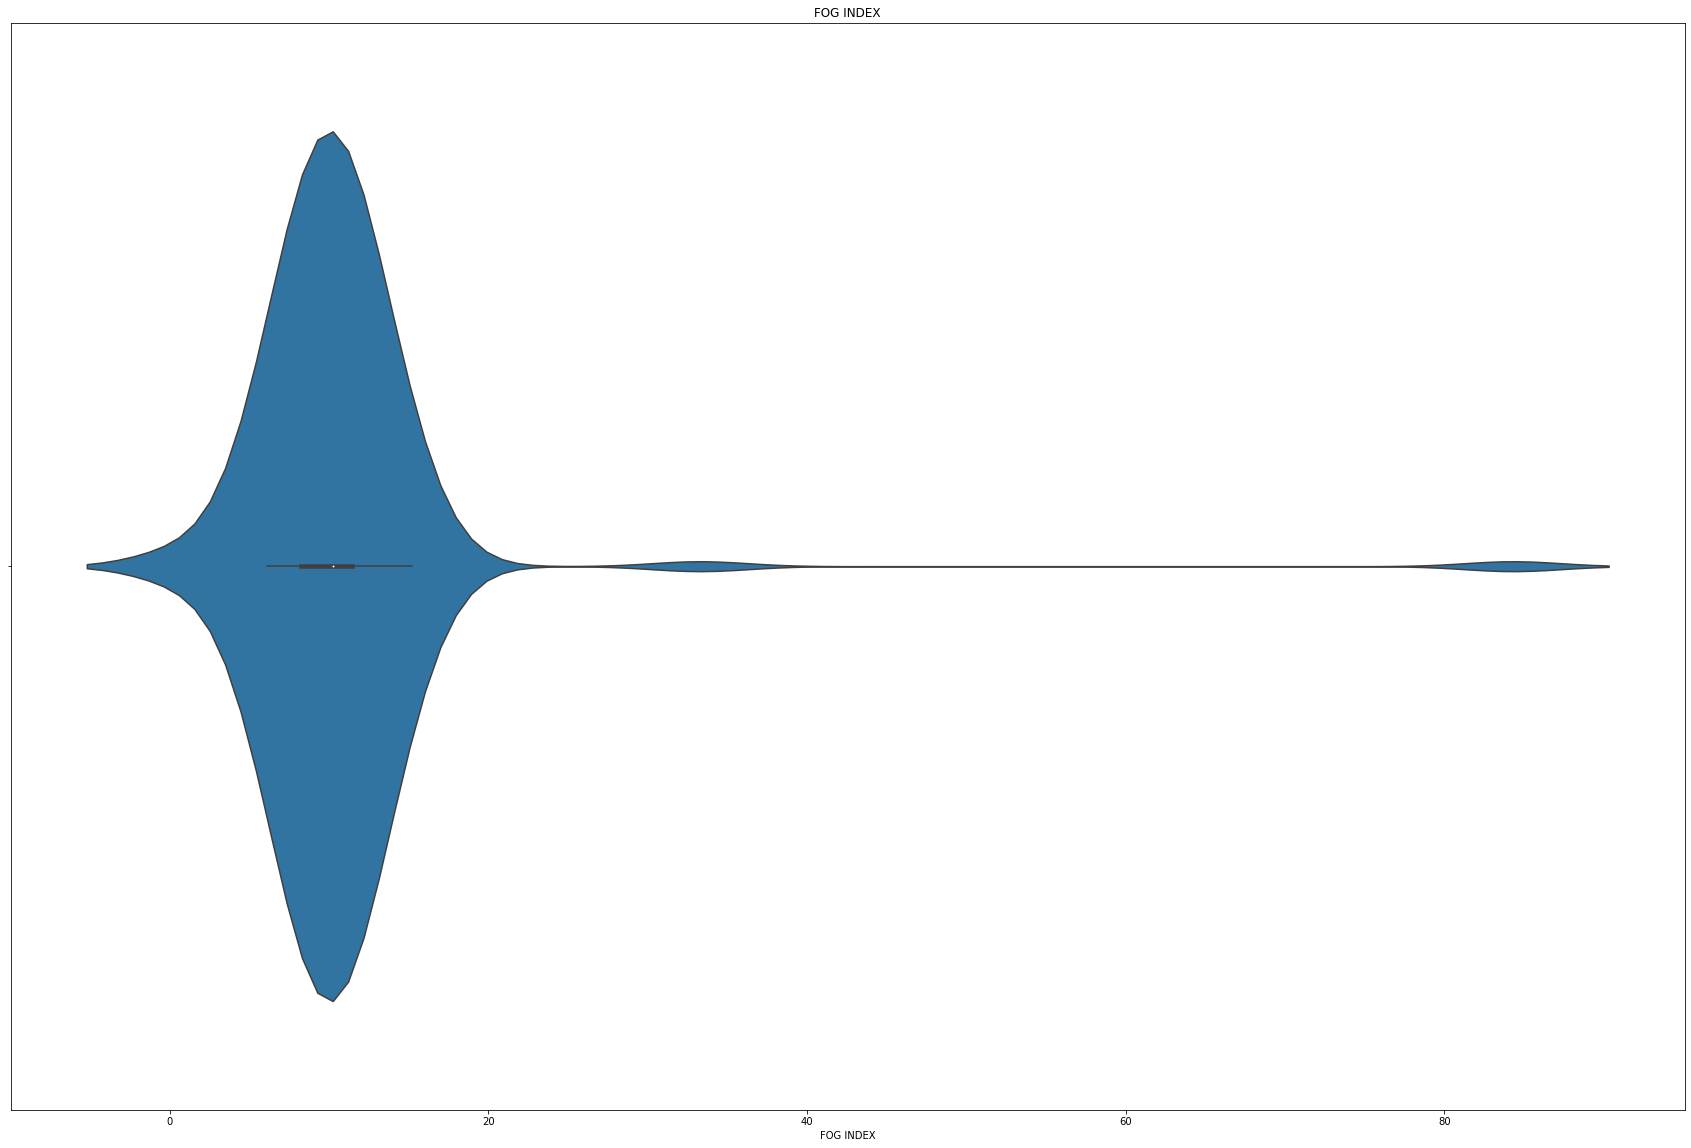

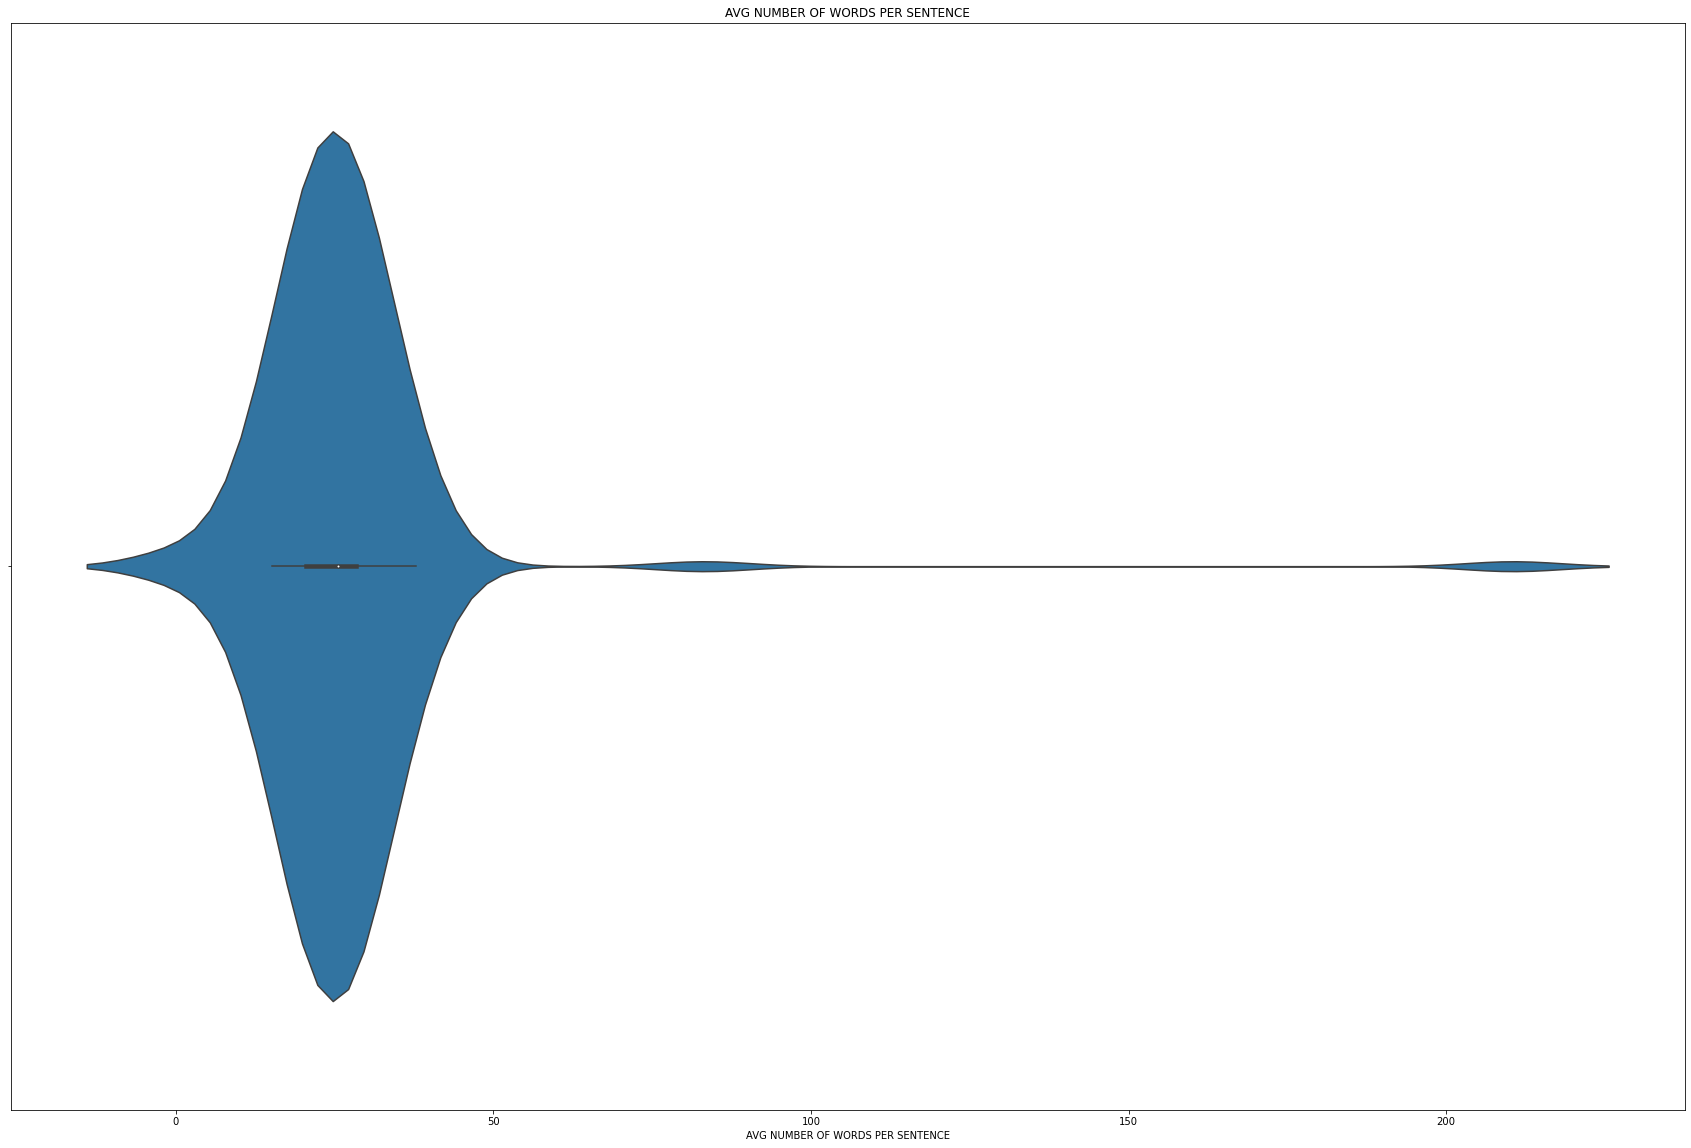

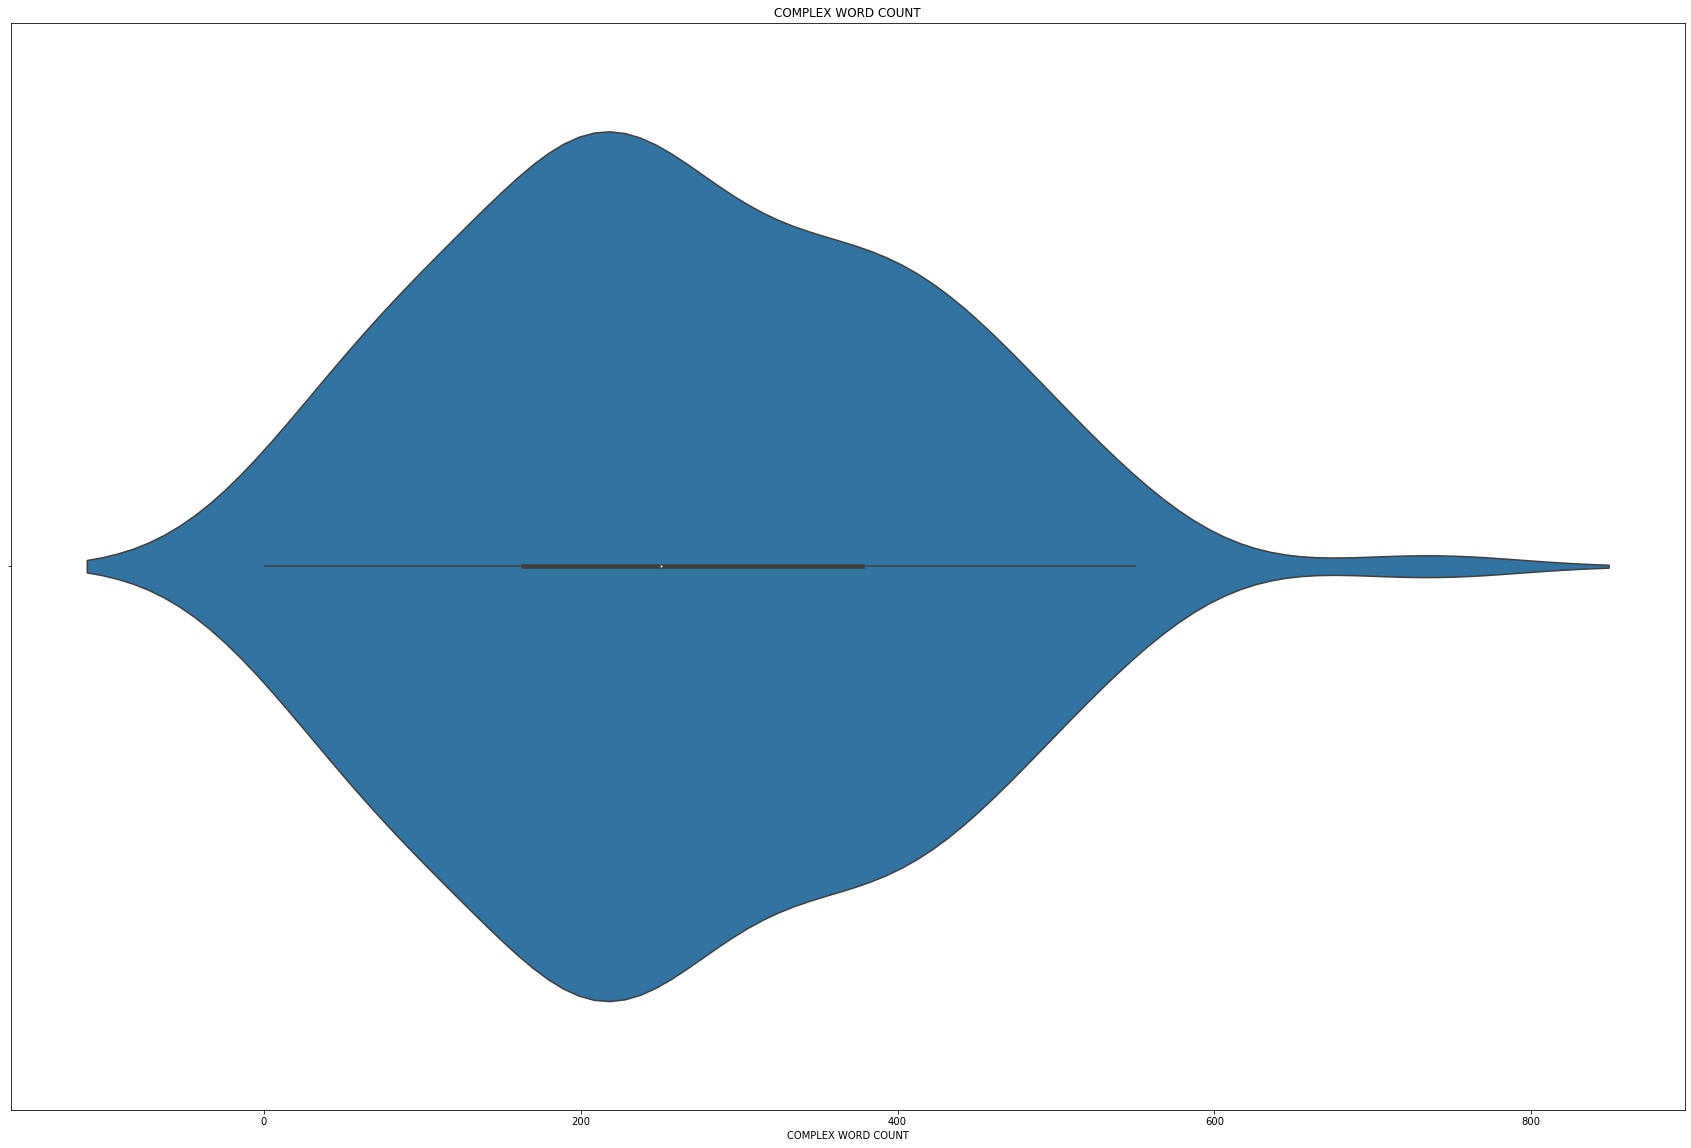

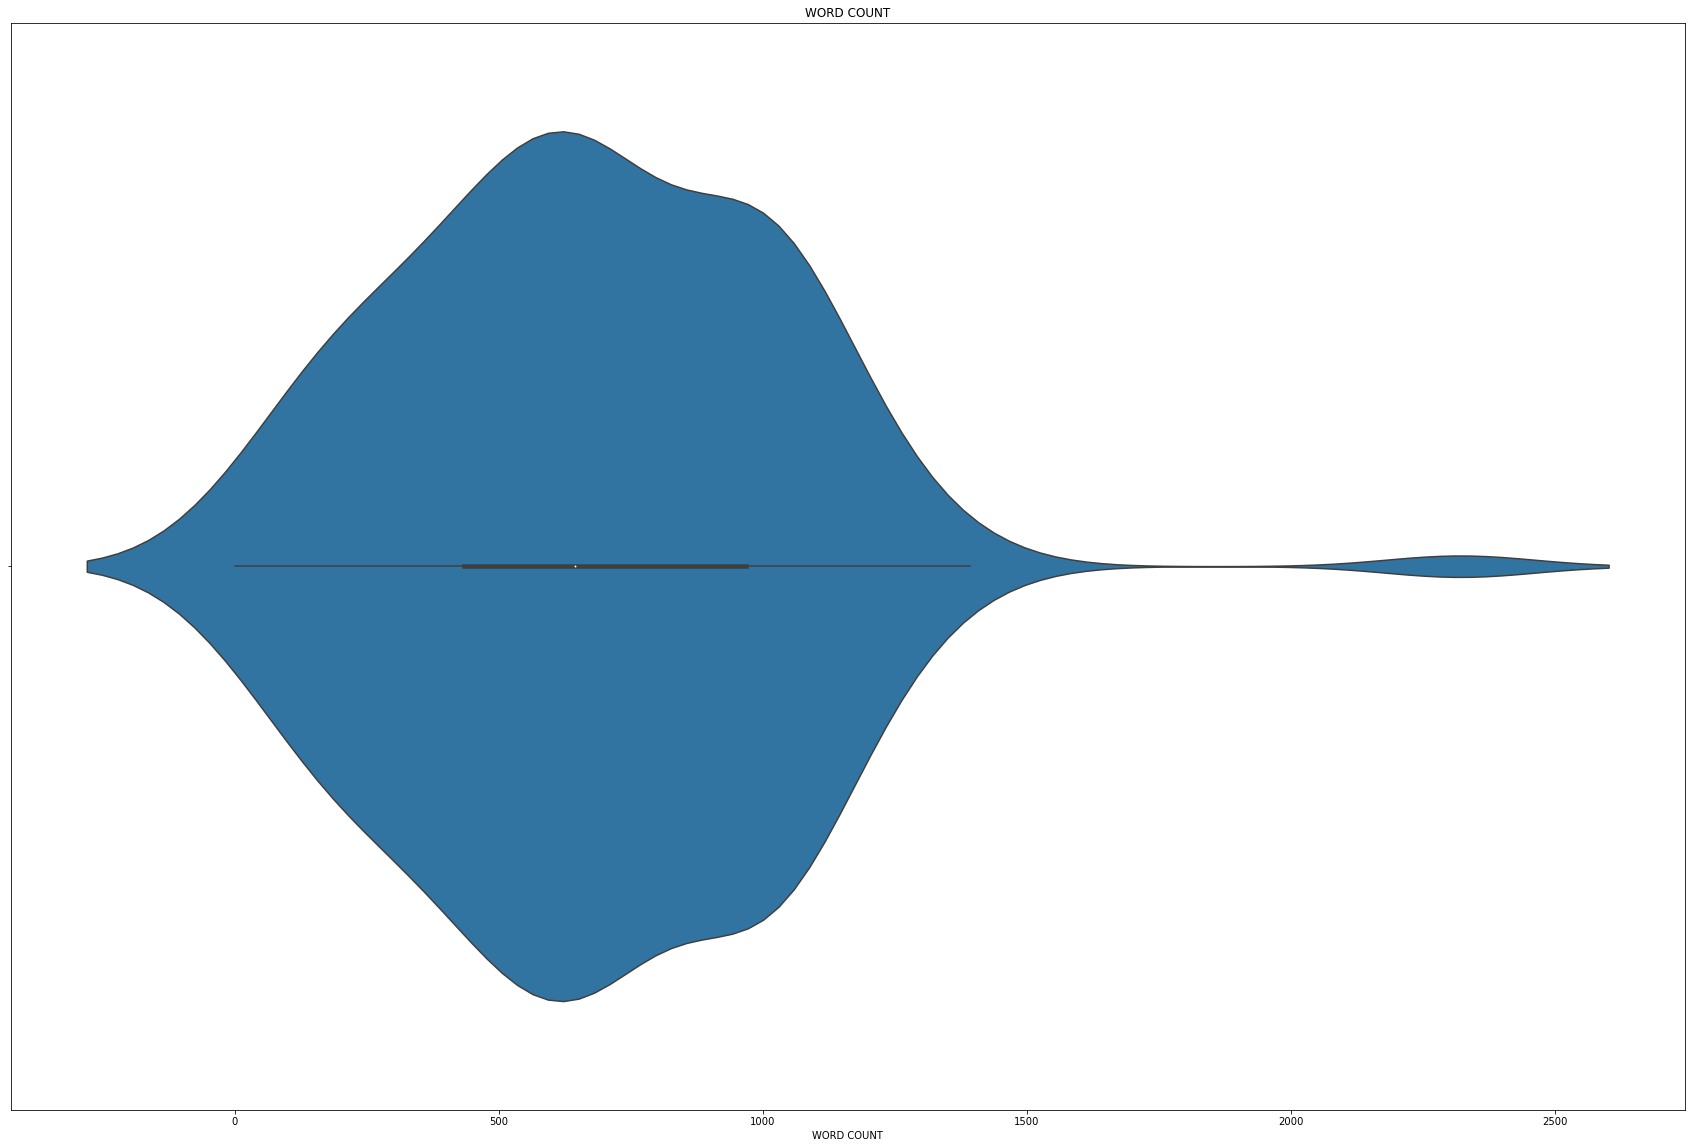

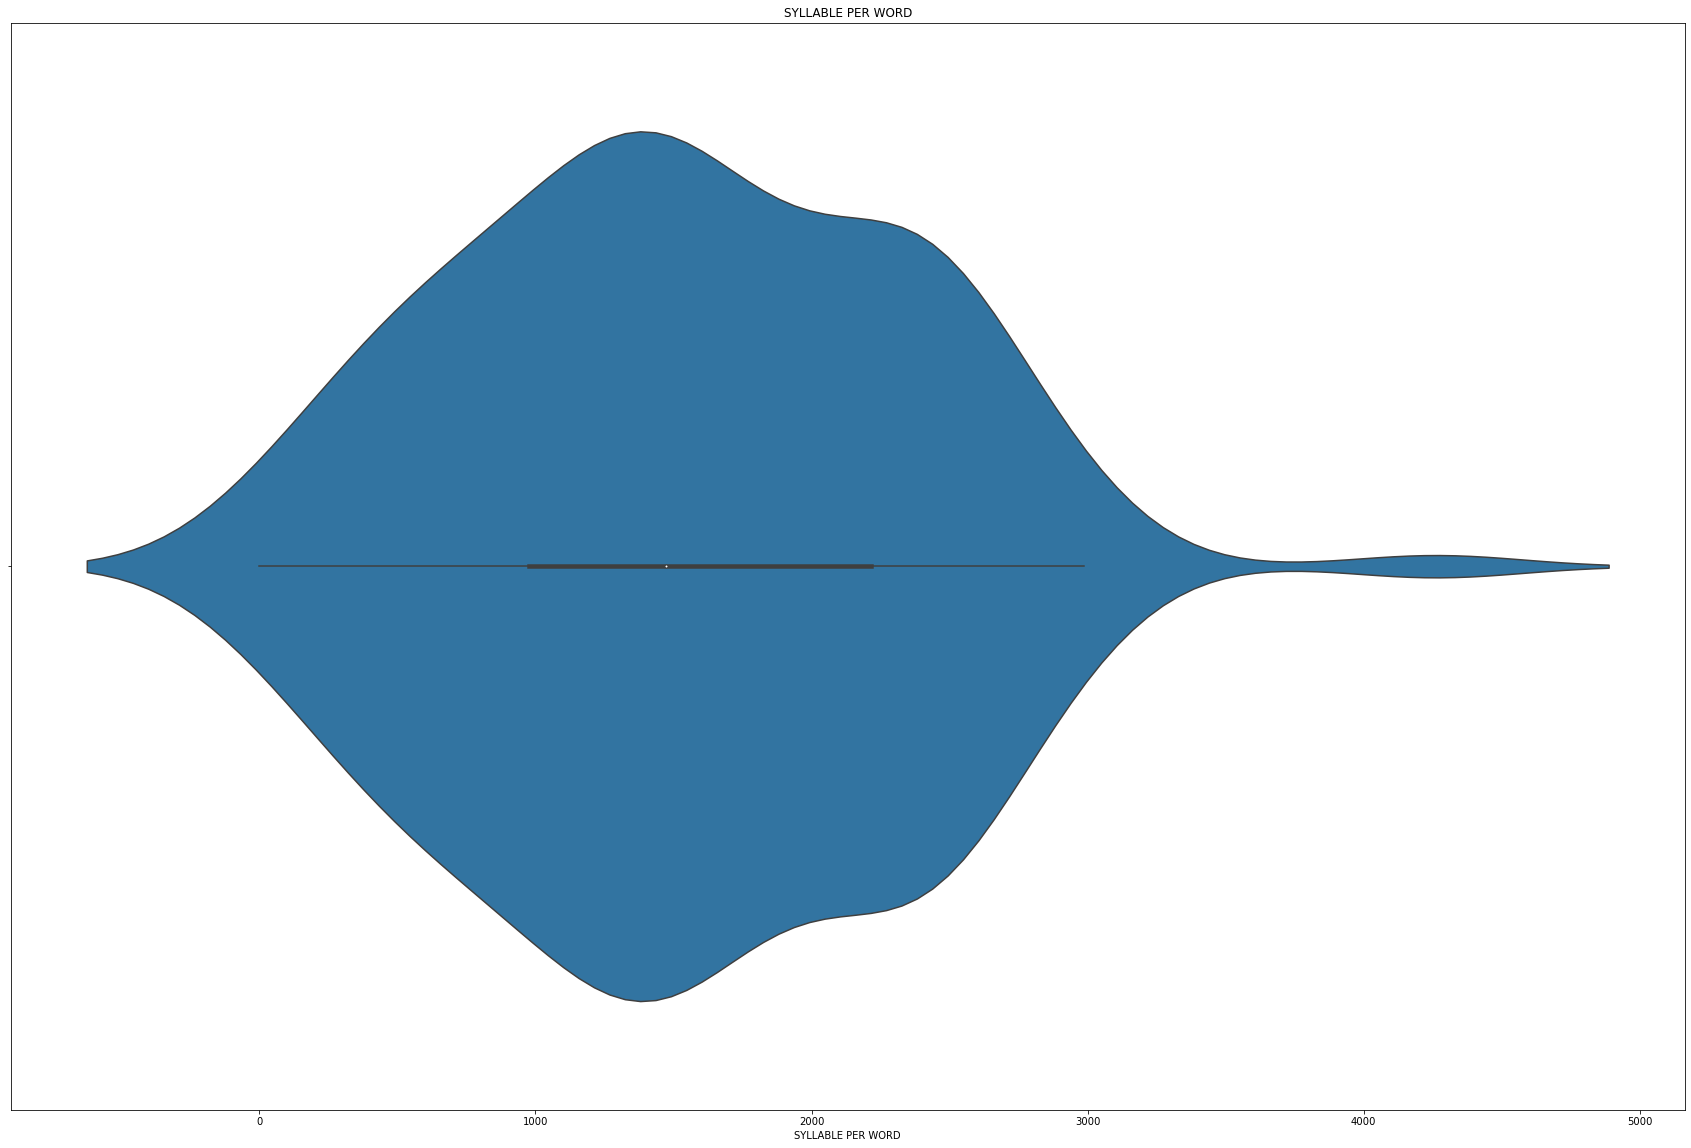

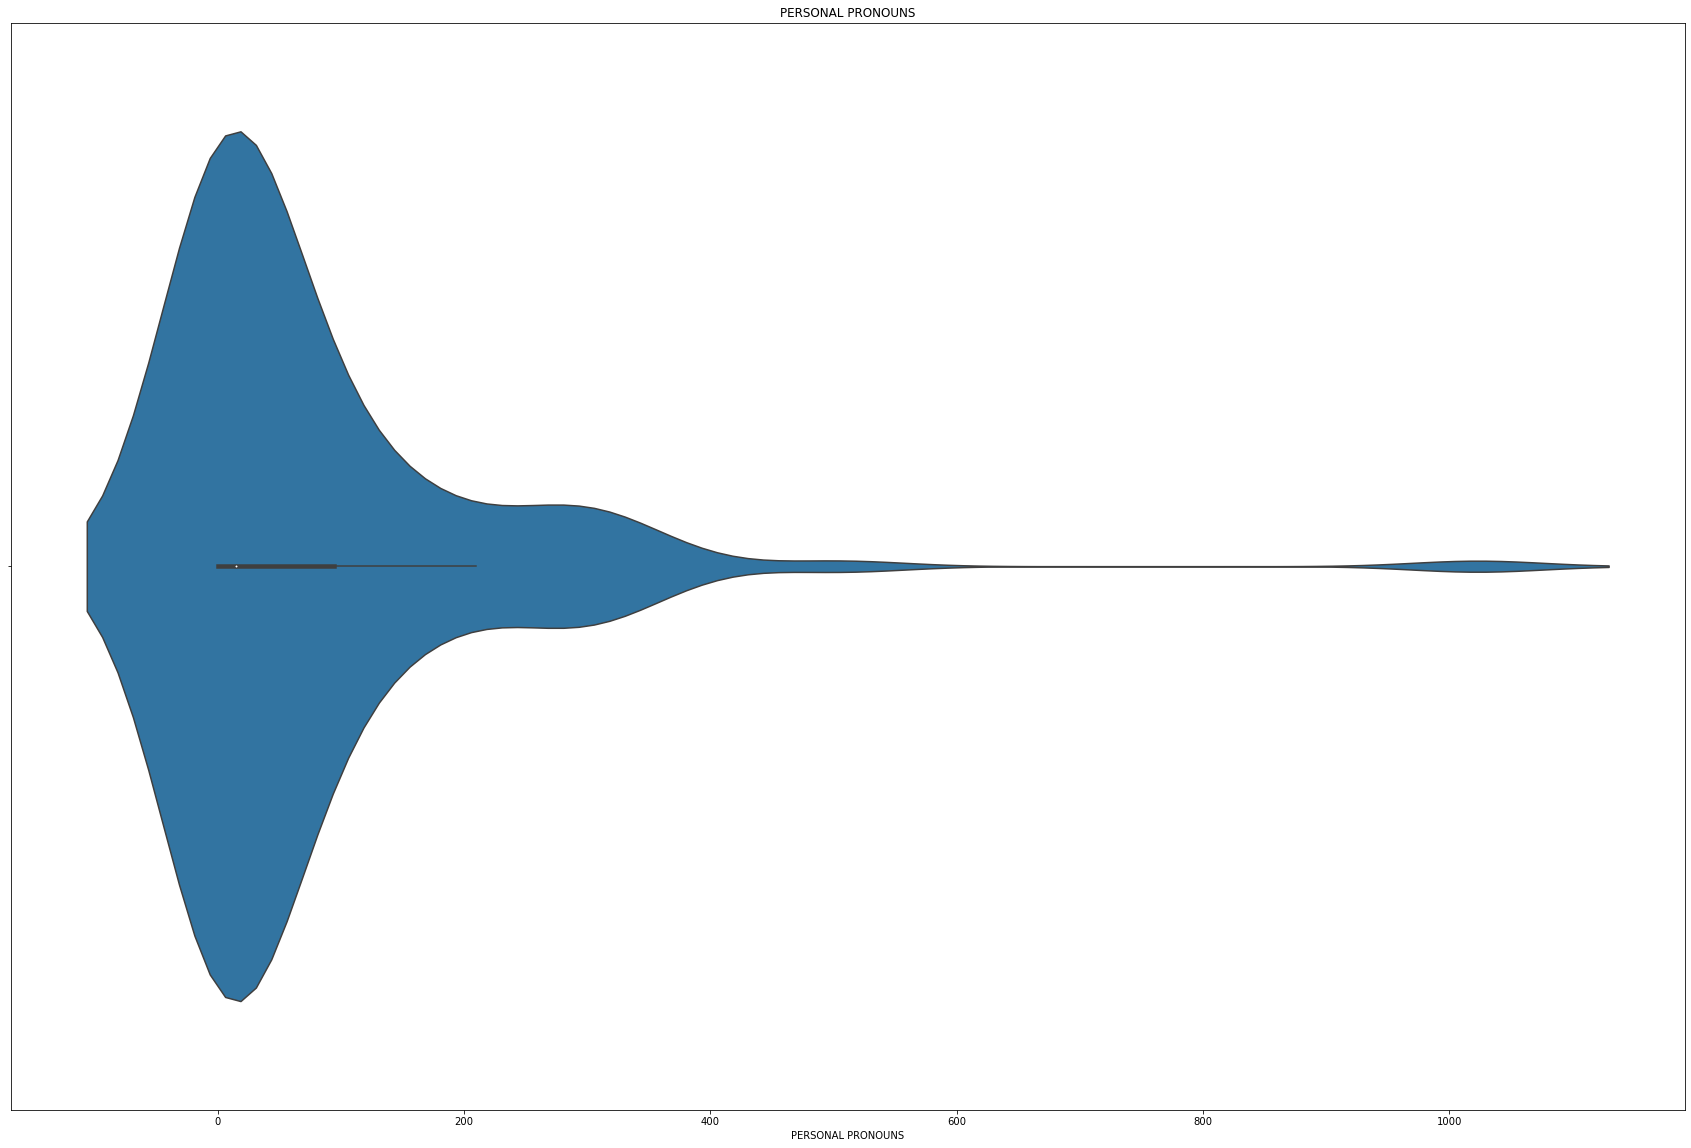

In [39]:
for i in l[2:]:
    violinplot(i)